# Predictive Analytics Project 3: Classification
- Author: Anthony Ayala
- Date: 11/15/2023

### ***Organic Products Case Study***

### The Business Scenario:
A supermarket is offering a new line of organic products. The supermarket’s management wants to determine which customers are most likely to purchase these products and develop a profile of the typical customer that purchases organic products. As a side issue, they would also like to understand whether customers that purchase organic products spend more (or less) on average than other customers. If they find that customers who purchase organic products are also highly profitable customers, that makes the additional cost of stocking organic products more palatable for the management.

### The Data:
The supermarket has a customer loyalty program. As an initial buyer incentive plan, the supermarket provided coupons for the organic products to all of the loyalty program participants and collected data that includes whether these customers purchased any of the organic products (organics.csv).The ORGANICS
data set contains 13 variables and over 22,000 observations

---

In [1]:
# Import the important libraries

from IPython.core.display import display, HTML
from IPython.display import clear_output
display(HTML("<style>.container { width:90% }</style>"))
import warnings
warnings.filterwarnings('ignore')
# ------------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm


# Logistic Regression libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.feature_selection import SelectFromModel

# Tree libraries

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

# 1. Data Preparation

---

In [2]:
# Load the csv files
df = pd.read_csv('/content/organics-1.csv')
df.head()

,ID,DemAffl,DemAge,DemCluster,DemClusterGroup,DemGender,DemReg,DemTVReg,PromClass,PromSpend,PromTime,TargetBuy,TargetAmt
0,140,10.0,76.0,16.0,C,U,Midlands,Wales & West,Gold,16000.00,4.0,0,0
1,620,4.0,49.0,35.0,D,U,Midlands,Wales & West,Gold,6000.00,5.0,0,0
2,868,5.0,70.0,27.0,D,F,Midlands,Wales & West,Silver,0.02,8.0,1,1
3,1120,10.0,65.0,51.0,F,M,Midlands,Midlands,Tin,0.01,7.0,1,1
4,2313,11.0,68.0,4.0,A,F,Midlands,Midlands,Tin,0.01,8.0,0,0


In [3]:
df_new = pd.read_csv('/content/New_organics-1.csv')
df_new.head()

,ID,DemAffl,DemAge,DemCluster,DemClusterGroup,DemGender,DemReg,DemTVReg,PromClass,PromSpend,PromTime
0,1,6,46,27,D,F,South East,London,Tin,0.01,8
1,2,10,39,12,B,M,Midlands,Ulster,Tin,0.01,5
2,3,7,75,12,B,M,Midlands,East,Silver,4000.00,7
3,4,7,72,12,B,F,Midlands,Ulster,Silver,1250.00,23
4,5,7,43,53,F,M,North,N West,Tin,0.01,5


In [4]:
# Info and Missing Values
print(df.info())
print(df.isnull().sum()) # Quite a bit of missing values so let's figure a way to handle that! I think the goal is fill in the values with the most common value under each column


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22223 entries, 0 to 22222
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               22223 non-null  int64  
 1   DemAffl          21138 non-null  float64
 2   DemAge           20715 non-null  float64
 3   DemCluster       21549 non-null  float64
 4   DemClusterGroup  21549 non-null  object 
 5   DemGender        19711 non-null  object 
 6   DemReg           21758 non-null  object 
 7   DemTVReg         21758 non-null  object 
 8   PromClass        22223 non-null  object 
 9   PromSpend        22223 non-null  float64
 10  PromTime         21942 non-null  float64
 11  TargetBuy        22223 non-null  int64  
 12  TargetAmt        22223 non-null  int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 2.2+ MB
None
ID                    0
DemAffl            1085
DemAge             1508
DemCluster          674
DemClusterGroup     674
DemGender     

In [5]:
print(df_new.info())
print(df_new.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               150 non-null    int64  
 1   DemAffl          150 non-null    int64  
 2   DemAge           150 non-null    int64  
 3   DemCluster       150 non-null    int64  
 4   DemClusterGroup  150 non-null    object 
 5   DemGender        150 non-null    object 
 6   DemReg           150 non-null    object 
 7   DemTVReg         150 non-null    object 
 8   PromClass        150 non-null    object 
 9   PromSpend        150 non-null    float64
 10  PromTime         150 non-null    int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 13.0+ KB
None
ID                 0
DemAffl            0
DemAge             0
DemCluster         0
DemClusterGroup    0
DemGender          0
DemReg             0
DemTVReg           0
PromClass          0
PromSpend          0
PromTime           

### Let's handle unnecessary columns and make sure we have the right data types


In [6]:
# drop unnecessary columns
df.drop(['ID', 'TargetAmt'], axis=1, inplace=True)
# convert diagnosis variable to numerical (optional)
df['TargetBuy'] = df['TargetBuy'].apply(lambda x: 1 if x == 1 else 0)
# Convert response from an integer to a categorical variable
df['TargetBuy'] = df['TargetBuy'].astype('category')
df.head()

,DemAffl,DemAge,DemCluster,DemClusterGroup,DemGender,DemReg,DemTVReg,PromClass,PromSpend,PromTime,TargetBuy
0,10.0,76.0,16.0,C,U,Midlands,Wales & West,Gold,16000.00,4.0,0
1,4.0,49.0,35.0,D,U,Midlands,Wales & West,Gold,6000.00,5.0,0
2,5.0,70.0,27.0,D,F,Midlands,Wales & West,Silver,0.02,8.0,1
3,10.0,65.0,51.0,F,M,Midlands,Midlands,Tin,0.01,7.0,1
4,11.0,68.0,4.0,A,F,Midlands,Midlands,Tin,0.01,8.0,0


In [7]:
# Double Check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22223 entries, 0 to 22222
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   DemAffl          21138 non-null  float64 
 1   DemAge           20715 non-null  float64 
 2   DemCluster       21549 non-null  float64 
 3   DemClusterGroup  21549 non-null  object  
 4   DemGender        19711 non-null  object  
 5   DemReg           21758 non-null  object  
 6   DemTVReg         21758 non-null  object  
 7   PromClass        22223 non-null  object  
 8   PromSpend        22223 non-null  float64 
 9   PromTime         21942 non-null  float64 
 10  TargetBuy        22223 non-null  category
dtypes: category(1), float64(5), object(5)
memory usage: 1.7+ MB


### Handling Missing Values? Let's fill them in with the most common values under each column!

In [8]:
print(df['DemAffl'].value_counts().nlargest(1)) # 8.0
print(df['DemAge'].value_counts().nlargest(1)) # 51.0
print(df['DemCluster'].value_counts().nlargest(1)) # 52.0
print(df['DemClusterGroup'].value_counts().nlargest(1)) # C
print(df['DemGender'].value_counts().nlargest(1)) # F
print(df['DemReg'].value_counts().nlargest(1)) # South East
print(df['DemTVReg'].value_counts().nlargest(1)) #London
print(df['PromTime'].value_counts().nlargest(1)) # 5.0

8.0    2634
Name: DemAffl, dtype: int64
51.0    610
Name: DemAge, dtype: int64
52.0    1205
Name: DemCluster, dtype: int64
C    4566
Name: DemClusterGroup, dtype: int64
F    12149
Name: DemGender, dtype: int64
South East    8634
Name: DemReg, dtype: int64
London    6189
Name: DemTVReg, dtype: int64
5.0    4314
Name: PromTime, dtype: int64


In [9]:
df['DemAffl'].fillna(8.0, inplace=True) # 8.0
df['DemAge'].fillna(51.0, inplace=True) # 51.0
df['DemCluster'].fillna(52.0, inplace=True) # 52.0
df['DemClusterGroup'].fillna("C", inplace=True) # C
df['DemGender'].fillna("F", inplace=True) # F
df['DemReg'].fillna('South East', inplace=True) # South East
df['DemTVReg'].fillna('London', inplace=True) #London
df['PromTime'].fillna(5.0, inplace=True) # 5.0
print(df.isnull().sum())

DemAffl            0
DemAge             0
DemCluster         0
DemClusterGroup    0
DemGender          0
DemReg             0
DemTVReg           0
PromClass          0
PromSpend          0
PromTime           0
TargetBuy          0
dtype: int64


# Exploratory Data Analysis and Answering Questions

---

### 1. Are there any noticeable differences between customers that purchase organic products versus those who don't purchase organic products?

<Axes: xlabel='TargetBuy', ylabel='count'>

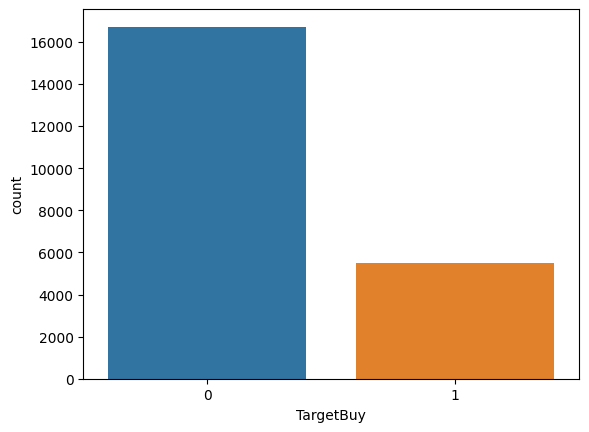

In [10]:
sns.countplot(df, x="TargetBuy") # We have a lot of non-organic buyers

### 2. Continuing along a similar path, are there any noticeable differences in the percentage of customers who purchase organic products across the different loyalty status groups (for example, is the percentage of platinum customers who purchase organic products higher than the percentage of tin customers who purchase organic products)?

<Axes: xlabel='TargetBuy', ylabel='count'>

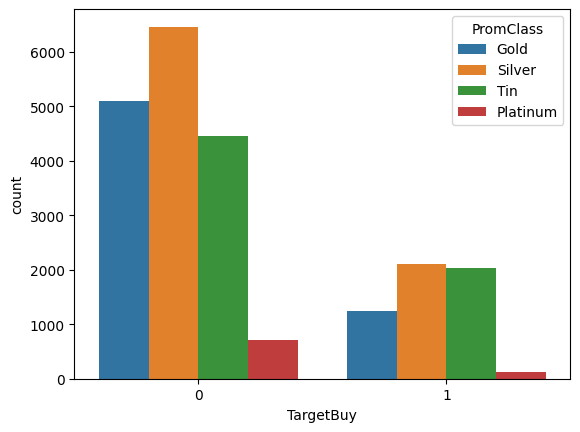

In [11]:
sns.countplot(df, x="TargetBuy", hue="PromClass")

In [12]:
# Create a second data frame for calculations, the problem is the datatype.
df_2 = df
print(df_2.info())
print(df_2['TargetBuy'].nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22223 entries, 0 to 22222
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   DemAffl          22223 non-null  float64 
 1   DemAge           22223 non-null  float64 
 2   DemCluster       22223 non-null  float64 
 3   DemClusterGroup  22223 non-null  object  
 4   DemGender        22223 non-null  object  
 5   DemReg           22223 non-null  object  
 6   DemTVReg         22223 non-null  object  
 7   PromClass        22223 non-null  object  
 8   PromSpend        22223 non-null  float64 
 9   PromTime         22223 non-null  float64 
 10  TargetBuy        22223 non-null  category
dtypes: category(1), float64(5), object(5)
memory usage: 1.7+ MB
None
2


In [13]:
df_2['TargetBuy'] = df_2['TargetBuy'].astype(int)

In [14]:
df_2['TargetBuy'].value_counts(normalize=True)

0    0.752284
1    0.247716
Name: TargetBuy, dtype: float64

In [15]:
# Let's create a filter
df_2 = df_2[df_2['TargetBuy'] == 1]

<Axes: xlabel='TargetBuy', ylabel='count'>

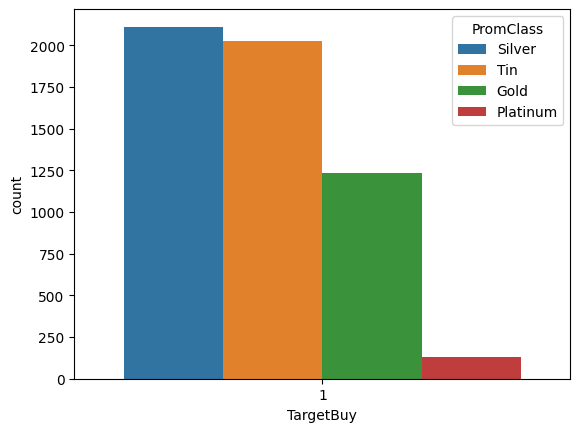

In [16]:
sns.countplot(df_2, x="TargetBuy", hue="PromClass")

In [17]:
# Percentage differences
# Silver
silver = "Silver"
silver_count = df_2['PromClass'].eq(silver).sum()

# Tin
tin = 'Tin'
tin_count = df_2['PromClass'].eq(tin).sum()

# Gold
gold = 'Gold'
gold_count = df_2['PromClass'].eq(gold).sum()

# Platinum
platinum = 'Platinum'
platinum_count = df_2['PromClass'].eq(platinum).sum()

# Total
total = df_2['PromClass'].count()

# Calculate percent total
silver_percent = (silver_count/total).round(3)*100
tin_percent = (tin_count/total).round(3)*100
gold_percent = (gold_count/total).round(3)*100
platinum_percent = (platinum_count/total).round(3)*100

# Print
print(f'Silver Percent: {silver_percent}%')
print(f'Tin Percent: {tin_percent}%')
print(f'Gold Percent:{gold_percent}%')
print(f'Platinum Percent:{platinum_percent}%')

Silver Percent: 38.4%
Tin Percent: 36.9%
Gold Percent:22.5%
Platinum Percent:2.3%


For organic shoppers/ethusiasts, we see that Tin loyalty status is the highest, then Silver, Gold and then Platinum. The higher the status the less common it is for these customers of such high loyalty status to purchase organic goods.


### 3. What factors seem to have the most impact on a customer's likelihood to purchase organic products?

We have to make a model and then calculate the variable importance! While in the meantime, we can generate some EDA plots.

<Axes: xlabel='TargetBuy', ylabel='count'>

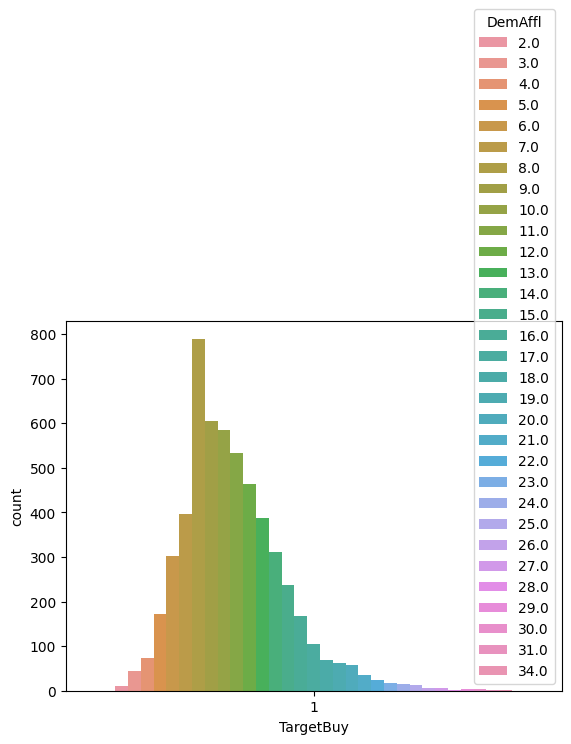

In [19]:
sns.countplot(df_2, x="TargetBuy", hue='DemAffl')

<Axes: xlabel='TargetBuy', ylabel='count'>

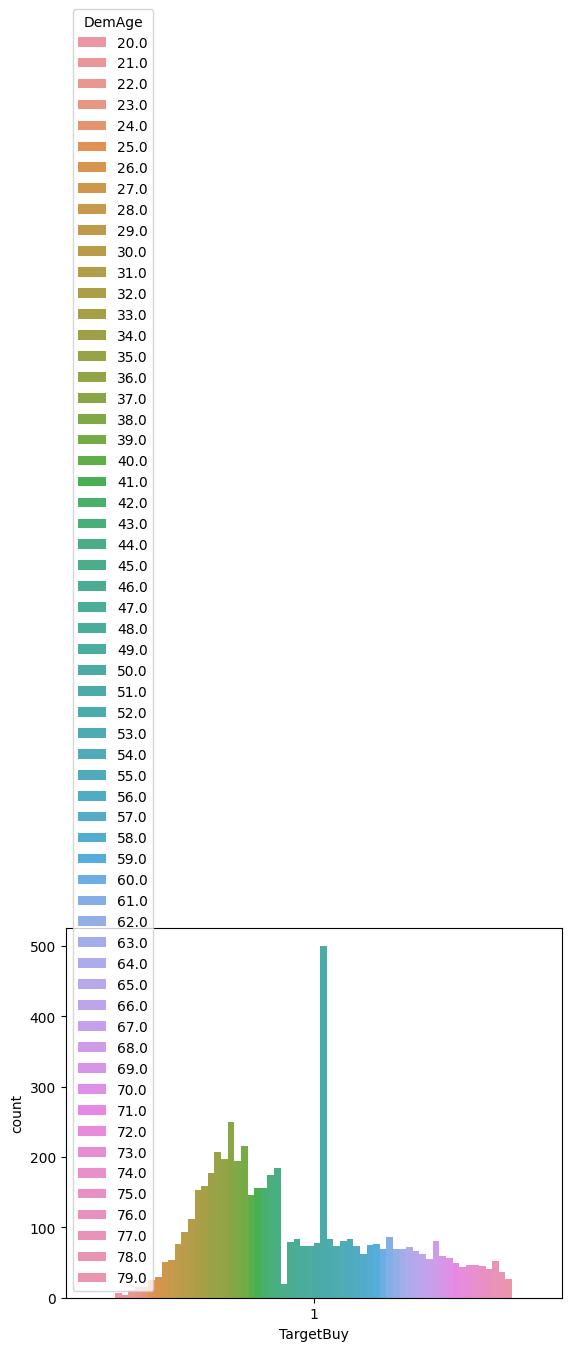

In [20]:
sns.countplot(df_2, x="TargetBuy", hue='DemAge')

<Axes: xlabel='TargetBuy', ylabel='count'>

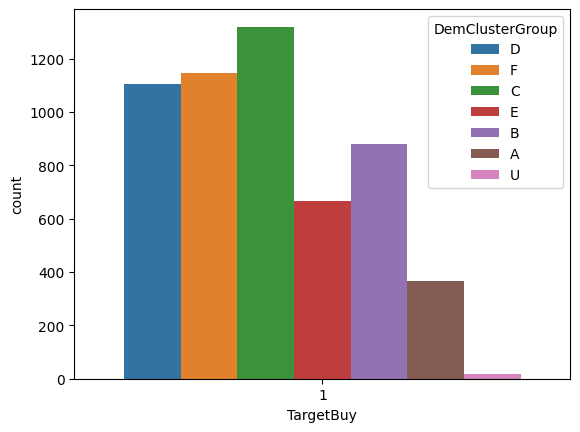

In [21]:
sns.countplot(df_2, x="TargetBuy", hue='DemClusterGroup')

<Axes: xlabel='TargetBuy', ylabel='count'>

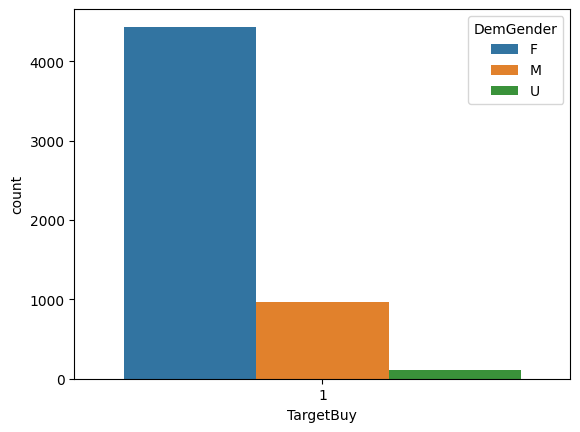

In [22]:
sns.countplot(df_2, x="TargetBuy", hue='DemGender')

<Axes: xlabel='TargetBuy', ylabel='count'>

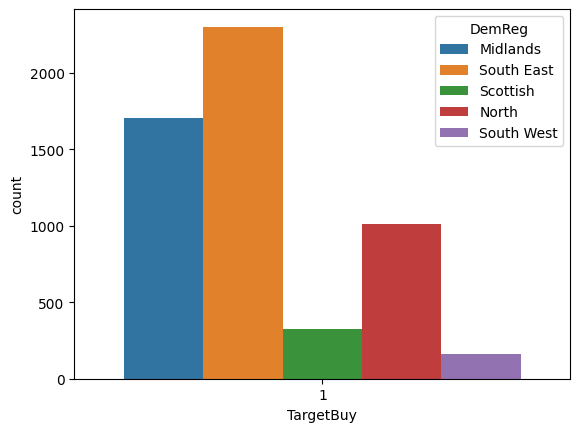

In [23]:
sns.countplot(df_2, x="TargetBuy", hue='DemReg')

<Axes: xlabel='TargetBuy', ylabel='count'>

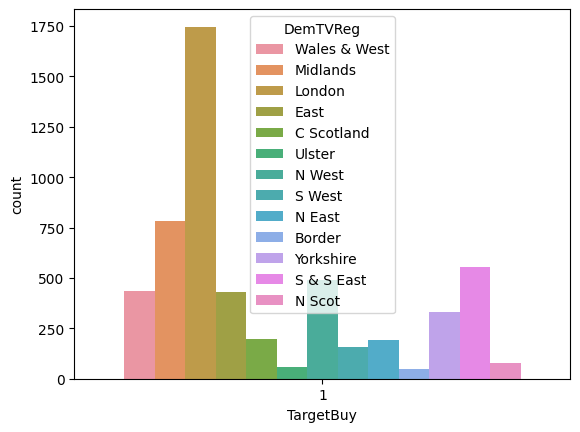

In [24]:
sns.countplot(df_2, x="TargetBuy", hue='DemTVReg')

### 4. Can you identify certain groups of customers who are more likely to purchase organic products? How would you describe those customers?

Just based on our analysis, we can see that older customers are less likely to buy organic goods than younger customers and the customers with a loyalty membership of Tin or either Silver are more likely to buy organic goods. For example, but again we will have to build models to confirm this and to actually classify this.

# Building Logisitc Regression Models and Classification Tree Models

---

## Training and Testing Data

In [350]:
df['TargetBuy'] = df['TargetBuy'].astype('category')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22223 entries, 0 to 22222
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   DemAffl          22223 non-null  float64 
 1   DemAge           22223 non-null  float64 
 2   DemCluster       22223 non-null  float64 
 3   DemClusterGroup  22223 non-null  object  
 4   DemGender        22223 non-null  object  
 5   DemReg           22223 non-null  object  
 6   DemTVReg         22223 non-null  object  
 7   PromClass        22223 non-null  object  
 8   PromSpend        22223 non-null  float64 
 9   PromTime         22223 non-null  float64 
 10  TargetBuy        22223 non-null  category
dtypes: category(1), float64(5), object(5)
memory usage: 1.7+ MB
None


In [351]:
# split the data into training and testing sets
X = df.drop(['TargetBuy'], axis=1)
#Full model minus variables causing singularities in the model
X=df[['DemAffl', 'DemAge','DemCluster','PromSpend', 'PromTime', 'DemClusterGroup','DemGender','DemReg','DemTVReg', 'PromClass']] # Dropped TargetAmt since it provides issues with the model later on
#Create dummy variables for nominal inputs
X = pd.get_dummies(X, columns=['DemClusterGroup','DemGender','DemReg','DemTVReg', 'PromClass'], drop_first=True)

y = df['TargetBuy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.info()
y_train.info()




<class 'pandas.core.frame.DataFrame'>
Int64Index: 15556 entries, 5426 to 15795
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   DemAffl                15556 non-null  float64
 1   DemAge                 15556 non-null  float64
 2   DemCluster             15556 non-null  float64
 3   PromSpend              15556 non-null  float64
 4   PromTime               15556 non-null  float64
 5   DemClusterGroup_B      15556 non-null  uint8  
 6   DemClusterGroup_C      15556 non-null  uint8  
 7   DemClusterGroup_D      15556 non-null  uint8  
 8   DemClusterGroup_E      15556 non-null  uint8  
 9   DemClusterGroup_F      15556 non-null  uint8  
 10  DemClusterGroup_U      15556 non-null  uint8  
 11  DemGender_M            15556 non-null  uint8  
 12  DemGender_U            15556 non-null  uint8  
 13  DemReg_North           15556 non-null  uint8  
 14  DemReg_Scottish        15556 non-null  uint8  
 15 

## Full Logistic Regression Model Using statsmodels
- Train the model on the training set
- evaluate the model on both the training and test sets

In [352]:
#Fit full logistic regression model to examine the significance of the terms
X = X_train
X = sm.add_constant(X)
y=y_train

logit_full = sm.Logit(y, X).fit()

#Print summary
print(logit_full.summary())


Optimization terminated successfully.
         Current function value: 0.449881
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              TargetBuy   No. Observations:                15556
Model:                          Logit   Df Residuals:                    15527
Method:                           MLE   Df Model:                           28
Date:                Mon, 20 Nov 2023   Pseudo R-squ.:                  0.1963
Time:                        19:21:15   Log-Likelihood:                -6998.4
converged:                       True   LL-Null:                       -8707.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.3378      0.147     -2.299      0.021      -0.626      -0.

### Evaluate the Model

In [353]:
# Generate predicted values for training set
pprob = logit_full.predict(X)

# Create predicted category for success using 50% cutoff
psuccess = (pprob > 0.5).astype(int)

# Add new variables to the training data set
X_train['p_success'] = psuccess
X_train['p_prob'] = pprob
X_train['y'] = y_train

X_train.info()


# Generate predicted values for test set

X_test = sm.add_constant(X_test)

pprob_test = logit_full.predict(X_test)

# Create predicted category for success using 50% cutoff
psuccess_test = (pprob_test > 0.5).astype(int)

# Add new variables to the response data set
X_test['p_success'] = psuccess_test
X_test['p_prob'] = pprob_test

X_test.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 15556 entries, 5426 to 15795
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   DemAffl                15556 non-null  float64 
 1   DemAge                 15556 non-null  float64 
 2   DemCluster             15556 non-null  float64 
 3   PromSpend              15556 non-null  float64 
 4   PromTime               15556 non-null  float64 
 5   DemClusterGroup_B      15556 non-null  uint8   
 6   DemClusterGroup_C      15556 non-null  uint8   
 7   DemClusterGroup_D      15556 non-null  uint8   
 8   DemClusterGroup_E      15556 non-null  uint8   
 9   DemClusterGroup_F      15556 non-null  uint8   
 10  DemClusterGroup_U      15556 non-null  uint8   
 11  DemGender_M            15556 non-null  uint8   
 12  DemGender_U            15556 non-null  uint8   
 13  DemReg_North           15556 non-null  uint8   
 14  DemReg_Scottish        15556 non-nu

### Confusion Matrix

In [354]:
# Generate confusion matrix for training set
conf_matrix = confusion_matrix(psuccess, y_train)
print(conf_matrix)

# Generate confusion matrix for test set
conf_matrix = confusion_matrix(psuccess_test, y_test)
print(conf_matrix)

[[11097  2492]
 [  606  1361]]
[[4767 1030]
 [ 248  622]]


### ROC Curve for Training Data

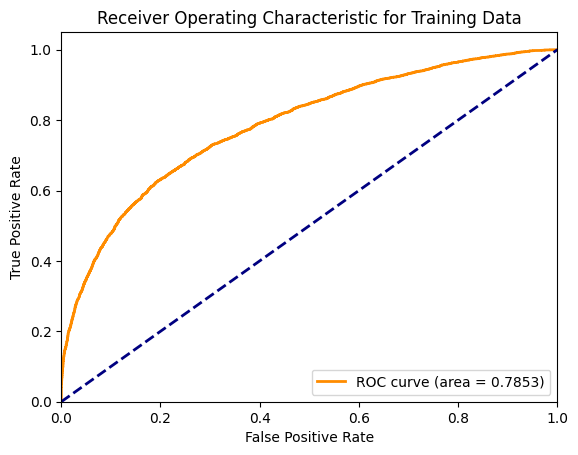

In [355]:
# Generate ROC curve for training data
fpr, tpr, thresholds = roc_curve(y_train.cat.codes, pprob)
roc_auc = roc_auc_score(y_train.cat.codes, pprob)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Training Data')
plt.legend(loc='lower right')
plt.show()

### ROC Curve for Testing Data

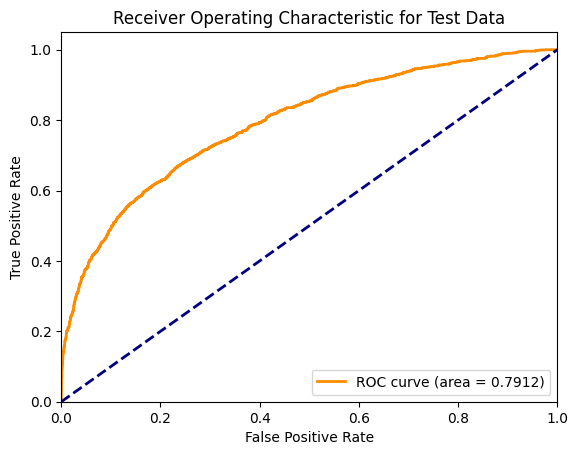

In [356]:
# Generate ROC curve for test data
fpr, tpr, thresholds = roc_curve(y_test.cat.codes, pprob_test)
roc_auc = roc_auc_score(y_test.cat.codes, pprob_test)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Test Data')
plt.legend(loc='lower right')
plt.show()

### Metrics

In [357]:
# calculate the accuracy, precision, and recall scores
acc_train = accuracy_score(y_train, psuccess)
prec_train = precision_score(y_train, psuccess)
rec_train = recall_score(y_train, psuccess)

# print the scores

print("Accuracy (Train) : {:.4f}".format(acc_train))
print("Precision (Train): {:.4f}".format(prec_train))
print("Recall (Train)  : {:.4f}".format(rec_train))
print("")

# calculate the accuracy, precision, and recall scores
acc_test = accuracy_score(y_test, psuccess_test)
prec_test = precision_score(y_test, psuccess_test)
rec_test = recall_score(y_test, psuccess_test)

# print the scores

print("Accuracy (Test) : {:.4f}".format(acc_test))
print("Precision (Test): {:.4f}".format(prec_test))
print("Recall (Test)  : {:.4f}".format(rec_test))
print("")

Accuracy (Train) : 0.8008
Precision (Train): 0.6919
Recall (Train)  : 0.3532

Accuracy (Test) : 0.8083
Precision (Test): 0.7149
Recall (Test)  : 0.3765



## Fit a reduced logistic regression (from stepwise variable selection)
- Subset selection

In [358]:
# split the data into training and testing sets
X2 = df.drop(['TargetBuy'], axis=1)
#Full model minus variables causing singularities in the model
X2=df[['DemAffl', 'DemAge','DemCluster','PromSpend', 'PromTime', 'DemClusterGroup','DemGender','DemReg','DemTVReg', 'PromClass']] # Dropped TargetAmt since it provides issues with the model later on
#Create dummy variables for nominal inputs
X2 = pd.get_dummies(X2, columns=['DemClusterGroup','DemGender','DemReg','DemTVReg', 'PromClass'], drop_first=True)

y2 = df['TargetBuy']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)

X2_train.info()
y2_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15556 entries, 5426 to 15795
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   DemAffl                15556 non-null  float64
 1   DemAge                 15556 non-null  float64
 2   DemCluster             15556 non-null  float64
 3   PromSpend              15556 non-null  float64
 4   PromTime               15556 non-null  float64
 5   DemClusterGroup_B      15556 non-null  uint8  
 6   DemClusterGroup_C      15556 non-null  uint8  
 7   DemClusterGroup_D      15556 non-null  uint8  
 8   DemClusterGroup_E      15556 non-null  uint8  
 9   DemClusterGroup_F      15556 non-null  uint8  
 10  DemClusterGroup_U      15556 non-null  uint8  
 11  DemGender_M            15556 non-null  uint8  
 12  DemGender_U            15556 non-null  uint8  
 13  DemReg_North           15556 non-null  uint8  
 14  DemReg_Scottish        15556 non-null  uint8  
 15 

### Fit a reduced stepwise logistic regression model to examine the significance of terms

In [359]:
#Fit reduced (stepwise) logistic regression model to examine the significance of the terms
X2 = X2_train
X2 = sm.add_constant(X2)
y2=y2_train

logit_step = sm.Logit(y2, X2).fit()

#Print summary
print(logit_step.summary())

Optimization terminated successfully.
         Current function value: 0.449881
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              TargetBuy   No. Observations:                15556
Model:                          Logit   Df Residuals:                    15527
Method:                           MLE   Df Model:                           28
Date:                Mon, 20 Nov 2023   Pseudo R-squ.:                  0.1963
Time:                        19:21:16   Log-Likelihood:                -6998.4
converged:                       True   LL-Null:                       -8707.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.3378      0.147     -2.299      0.021      -0.626      -0.

### Generate predictions

In [360]:
# Generate predicted values for training set
pprob2 = logit_step.predict(X2)

# Create predicted category for success using 50% cutoff
psuccess2 = (pprob2 > 0.5).astype(int)

# Add new variables to the training data set
X2_train['p_success'] = psuccess2
X2_train['p_prob'] = pprob2
X2_train['y'] = y2_train

X2_train.info()


# Generate predicted values for test set

X2_test = sm.add_constant(X2_test)

pprob2_test = logit_step.predict(X2_test)

# Create predicted category for success using 50% cutoff
psuccess2_test = (pprob2_test > 0.5).astype(int)

# Add new variables to the response data set
X2_test['p_success'] = psuccess2_test
X2_test['p_prob'] = pprob2_test

X2_test.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 15556 entries, 5426 to 15795
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   DemAffl                15556 non-null  float64 
 1   DemAge                 15556 non-null  float64 
 2   DemCluster             15556 non-null  float64 
 3   PromSpend              15556 non-null  float64 
 4   PromTime               15556 non-null  float64 
 5   DemClusterGroup_B      15556 non-null  uint8   
 6   DemClusterGroup_C      15556 non-null  uint8   
 7   DemClusterGroup_D      15556 non-null  uint8   
 8   DemClusterGroup_E      15556 non-null  uint8   
 9   DemClusterGroup_F      15556 non-null  uint8   
 10  DemClusterGroup_U      15556 non-null  uint8   
 11  DemGender_M            15556 non-null  uint8   
 12  DemGender_U            15556 non-null  uint8   
 13  DemReg_North           15556 non-null  uint8   
 14  DemReg_Scottish        15556 non-nu

### Confusion Matrix

In [361]:
# Generate confusion matrix for training set
conf_matrix = confusion_matrix(psuccess2, y2_train)
print(conf_matrix)

# Generate confusion matrix for test set
conf_matrix = confusion_matrix(psuccess2_test, y2_test)
print(conf_matrix)

[[11097  2492]
 [  606  1361]]
[[4767 1030]
 [ 248  622]]


ROC Curve for Stepwise Training Data

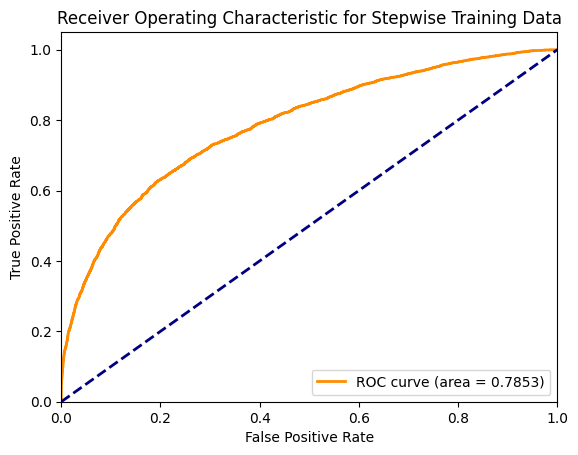

In [362]:
# Generate ROC curve for training data
fpr, tpr, thresholds = roc_curve(y2_train.cat.codes, pprob2)
roc_auc = roc_auc_score(y2_train.cat.codes, pprob2)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Stepwise Training Data')
plt.legend(loc='lower right')
plt.show()

### ROC Curve for Stepwise Test Data

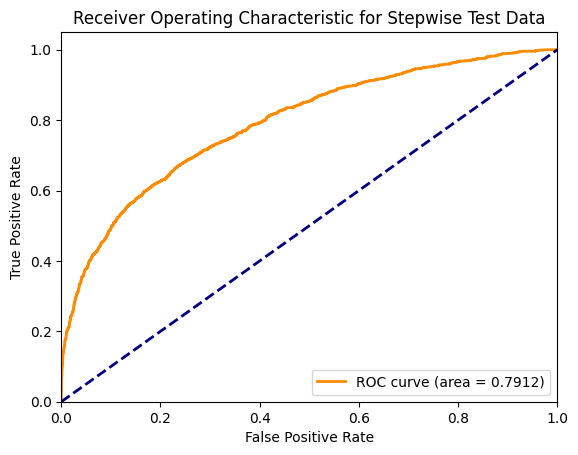

In [363]:
# Generate ROC curve for test data
fpr, tpr, thresholds = roc_curve(y2_test.cat.codes, pprob2_test)
roc_auc = roc_auc_score(y2_test.cat.codes, pprob2_test)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Stepwise Test Data')
plt.legend(loc='lower right')
plt.show()

### Metrics/Scores

In [364]:
# calculate the accuracy, precision, and recall scores
acc_train2 = accuracy_score(y2_train, psuccess2)
prec_train2 = precision_score(y2_train, psuccess2)
rec_train2 = recall_score(y2_train, psuccess2)

# print the scores

print("Accuracy (Train) : {:.4f}".format(acc_train2))
print("Precision (Train): {:.4f}".format(prec_train2))
print("Recall (Train)  : {:.4f}".format(rec_train2))
print("")

# calculate the accuracy, precision, and recall scores
acc_test2 = accuracy_score(y2_test, psuccess2_test)
prec_test2 = precision_score(y2_test, psuccess2_test)
rec_test2 = recall_score(y2_test, psuccess2_test)

# print the scores

print("Accuracy (Test) : {:.4f}".format(acc_test2))
print("Precision (Test): {:.4f}".format(prec_test2))
print("Recall (Test)  : {:.4f}".format(rec_test2))
print("")


Accuracy (Train) : 0.8008
Precision (Train): 0.6919
Recall (Train)  : 0.3532

Accuracy (Test) : 0.8083
Precision (Test): 0.7149
Recall (Test)  : 0.3765



## L1 Regularization (LASSO), L2 Regularization Ridge Regression, Elastic Net
**SHINKAGE**
- (L1) Can shrink coefficients to zero so can be used for feature selection
- (L1) Reduces overfitting by eliminating features
- (L2) Does not shrink coefficients all the way to 0
- (L2) Reduces impact of features that are not important predictors
- Elastic Net (hybrid) Combines feature elimination and feature reduction to improve model’s predictions


In [365]:
# split the data into training and testing sets
X3 = df.drop(['TargetBuy'], axis=1)
#Full model minus variables causing singularities in the model
X3=df[['DemAffl', 'DemAge','DemCluster','PromSpend', 'PromTime', 'DemClusterGroup','DemGender','DemReg','DemTVReg', 'PromClass']] # Dropped TargetAmt since it provides issues with the model later on
#Create dummy variables for nominal inputs
X3 = pd.get_dummies(X3, columns=['DemClusterGroup','DemGender','DemReg','DemTVReg', 'PromClass'], drop_first=True)

y3 = df['TargetBuy']
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=42)

X3_train.info()
y3_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15556 entries, 5426 to 15795
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   DemAffl                15556 non-null  float64
 1   DemAge                 15556 non-null  float64
 2   DemCluster             15556 non-null  float64
 3   PromSpend              15556 non-null  float64
 4   PromTime               15556 non-null  float64
 5   DemClusterGroup_B      15556 non-null  uint8  
 6   DemClusterGroup_C      15556 non-null  uint8  
 7   DemClusterGroup_D      15556 non-null  uint8  
 8   DemClusterGroup_E      15556 non-null  uint8  
 9   DemClusterGroup_F      15556 non-null  uint8  
 10  DemClusterGroup_U      15556 non-null  uint8  
 11  DemGender_M            15556 non-null  uint8  
 12  DemGender_U            15556 non-null  uint8  
 13  DemReg_North           15556 non-null  uint8  
 14  DemReg_Scottish        15556 non-null  uint8  
 15 

### Fit Logistic Regression Models using L1, L2, and Elastic Net

In [366]:
# Create an Instance of Logistic Regression for LASSO Selection  using c = 0.1 and c = 0.01

lr_l1_1 = LogisticRegression(penalty='l1', solver='liblinear', C=0.1)
lr_l1_01 = LogisticRegression(penalty='l1', solver='liblinear', C=0.01)

# fit the models to the training data
lr_l1_1.fit(X3_train, y3_train)
lr_l1_01.fit(X3_train, y3_train)

# Create an Instance of Logistic Regression for Ridge Regression (L2 regularization)
lr_l2 = LogisticRegression(penalty='l2', solver='liblinear')

# Create an instance of Logistic Regression for Elastic Net
lr_l12 = LogisticRegression(penalty='elasticnet', l1_ratio=0.5, solver='saga')

# fit the models to the training data
lr_l2.fit(X3_train, y3_train)
lr_l12.fit(X3_train, y3_train)




LogisticRegression(l1_ratio=0.5, penalty='elasticnet', solver='saga')

In [401]:
# function for model coefficents
def rpt_model_variables(model, features):
    # Get the intercept term
    intercept = model.intercept_

    # Access the coefficients (weights) of the model, i rounded them
    coefficients = np.round(model.coef_[0],decimals=4)

    # Create DataFrames for intercept and coefficients
    df_intercept = pd.DataFrame({'feature': ['Intercept'], 'coefficient': [intercept[0]]})
    df_coefficients = pd.DataFrame({'feature': X3.columns, 'coefficient': coefficients})
    df_coefficients['abs_coefficient'] = df_coefficients['coefficient'].abs()
    df_coefficients.sort_values(by='abs_coefficient', ascending=False, inplace=True)

    # if you want to add intercept to table
    df_model = pd.concat([df_intercept, df_coefficients]).reset_index(drop=True)

    # Print the DataFrame
    print(df_coefficients)

    return df_coefficients

df_coefficients1 = rpt_model_variables(lr_l1_1, X3)
df_coefficients01 = rpt_model_variables(lr_l1_01, X3)
df_coefficients2 = rpt_model_variables(lr_l2, X3)
df_coefficients12 = rpt_model_variables(lr_l12, X3)

                  feature  coefficient  abs_coefficient
12            DemGender_U      -1.6364           1.6364
11            DemGender_M      -0.7532           0.7532
0                 DemAffl       0.2404           0.2404
1                  DemAge      -0.0547           0.0547
6       DemClusterGroup_C       0.0505           0.0505
30       PromClass_Silver      -0.0308           0.0308
13           DemReg_North      -0.0306           0.0306
15      DemReg_South East      -0.0235           0.0235
25        DemTVReg_S West       0.0051           0.0051
16      DemReg_South West       0.0043           0.0043
4                PromTime       0.0030           0.0030
2              DemCluster       0.0010           0.0010
10      DemClusterGroup_U       0.0000           0.0000
22        DemTVReg_N Scot       0.0000           0.0000
29     PromClass_Platinum       0.0000           0.0000
28     DemTVReg_Yorkshire       0.0000           0.0000
27  DemTVReg_Wales & West       0.0000          

In [402]:
# function for model coefficents
def rpt_model_variables(model):
    # Get the intercept term
    intercept = model.intercept_

    # Access the coefficients (weights) of the model, i rounded them
    coefficients = np.round(model.coef_[0],decimals=4)

    # Create DataFrames for intercept and coefficients
    #df_intercept = pd.DataFrame({'feature': ['Intercept'], 'coefficient': [intercept[0]]})
    df_coefficients = pd.DataFrame({'feature': X3.columns, 'coefficient': coefficients})
    df_coefficients['abs_coefficient'] = df_coefficients['coefficient'].abs()
    df_coefficients.sort_values(by='abs_coefficient', ascending=False, inplace=True)

    # if you want to add intercept to table
    #df_model = pd.concat([df_intercept, df_coefficients]).reset_index(drop=True)

    # Print the DataFrame
    print(df_coefficients)

    return df_coefficients

df_coefficients1 = rpt_model_variables(lr_l1_1)
df_coefficients01 = rpt_model_variables(lr_l1_01)
df_coefficients2 = rpt_model_variables(lr_l2)
df_coefficients12 = rpt_model_variables(lr_l12)

                  feature  coefficient  abs_coefficient
12            DemGender_U      -1.6364           1.6364
11            DemGender_M      -0.7532           0.7532
0                 DemAffl       0.2404           0.2404
1                  DemAge      -0.0547           0.0547
6       DemClusterGroup_C       0.0505           0.0505
30       PromClass_Silver      -0.0308           0.0308
13           DemReg_North      -0.0306           0.0306
15      DemReg_South East      -0.0235           0.0235
25        DemTVReg_S West       0.0051           0.0051
16      DemReg_South West       0.0043           0.0043
4                PromTime       0.0030           0.0030
2              DemCluster       0.0010           0.0010
10      DemClusterGroup_U       0.0000           0.0000
22        DemTVReg_N Scot       0.0000           0.0000
29     PromClass_Platinum       0.0000           0.0000
28     DemTVReg_Yorkshire       0.0000           0.0000
27  DemTVReg_Wales & West       0.0000          

### Variable Importance

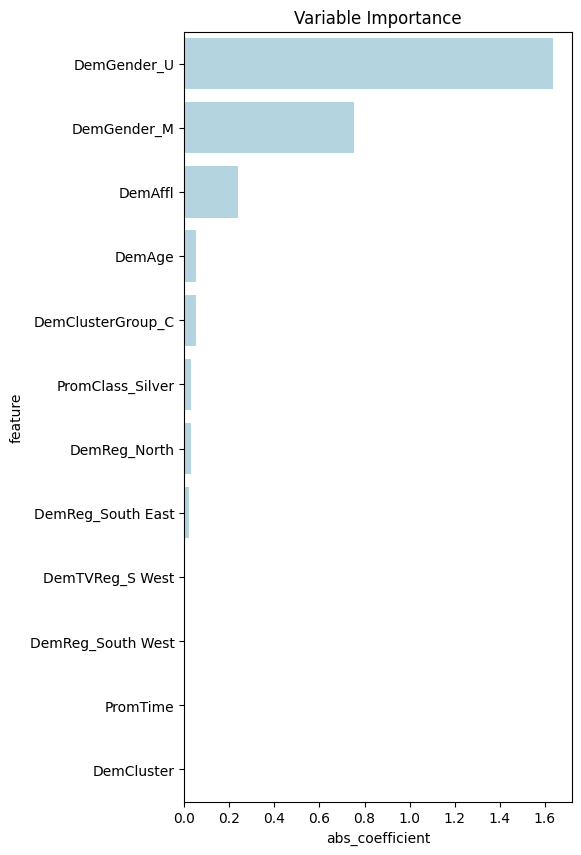

-- rejected --
 DemClusterGroup_U
 DemTVReg_N Scot
 PromClass_Platinum
 DemTVReg_Yorkshire
 DemTVReg_Wales & West
 DemTVReg_Ulster
 PromSpend
 DemTVReg_S & S East
 DemTVReg_N West
 DemTVReg_N East
 DemClusterGroup_F
 DemTVReg_Midlands
 DemTVReg_London
 DemTVReg_East
 DemTVReg_C Scotland
 DemClusterGroup_B
 DemReg_Scottish
 DemClusterGroup_D
 DemClusterGroup_E
 PromClass_Tin


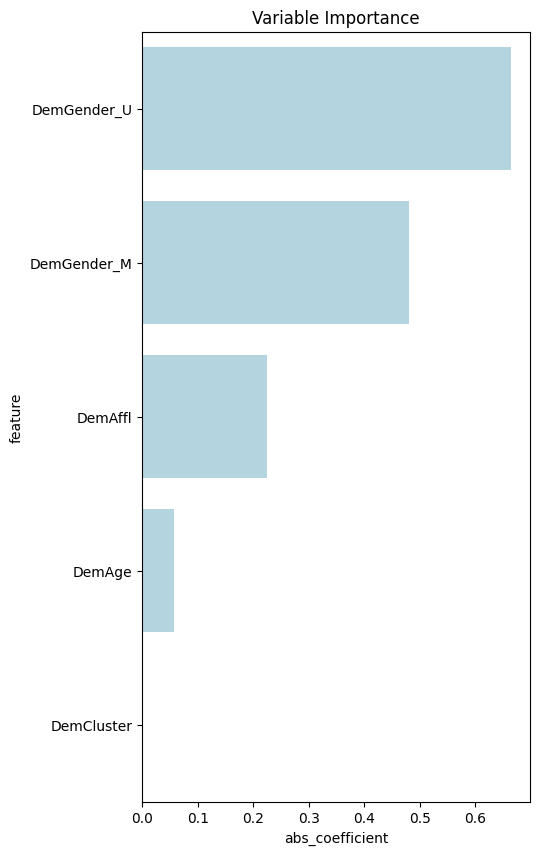

-- rejected --
 DemTVReg_N West
 DemTVReg_Midlands
 DemTVReg_N East
 DemTVReg_N Scot
 DemTVReg_S & S East
 DemTVReg_East
 DemTVReg_S West
 DemTVReg_Ulster
 DemTVReg_Wales & West
 DemTVReg_Yorkshire
 PromClass_Platinum
 PromClass_Silver
 DemTVReg_London
 DemReg_South West
 DemTVReg_C Scotland
 DemReg_South East
 DemReg_Scottish
 DemReg_North
 DemClusterGroup_U
 DemClusterGroup_F
 DemClusterGroup_E
 DemClusterGroup_D
 DemClusterGroup_C
 DemClusterGroup_B
 PromTime
 PromSpend
 PromClass_Tin


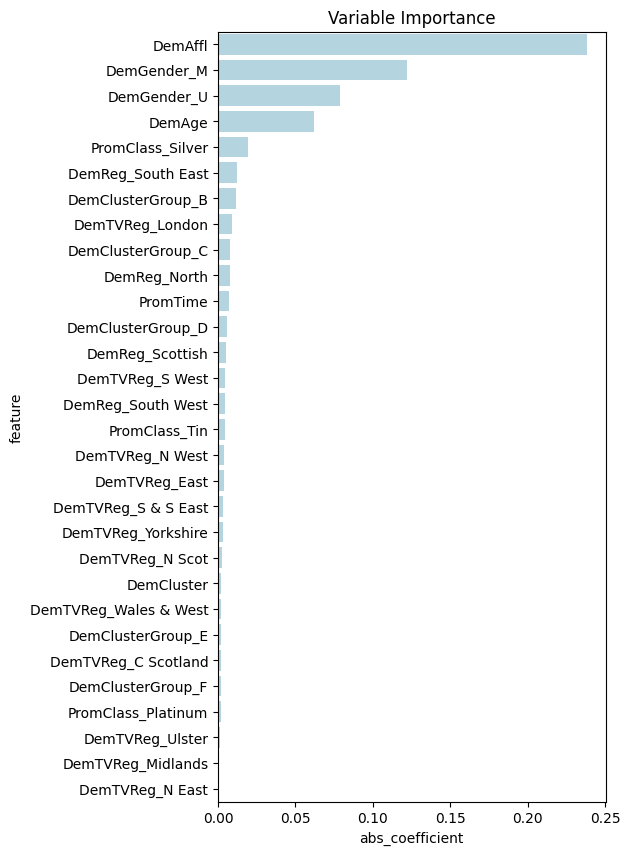

-- rejected --
 PromSpend
 DemClusterGroup_U


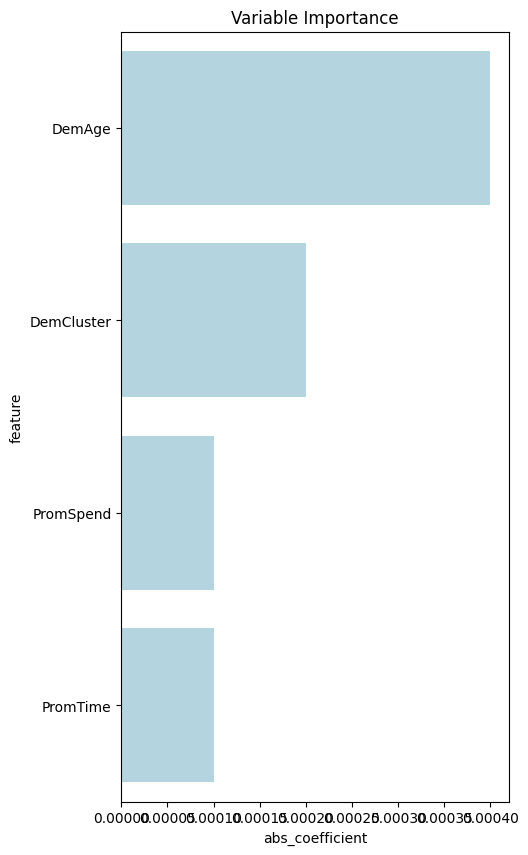

-- rejected --
 DemAffl
 DemTVReg_S & S East
 DemTVReg_Midlands
 DemTVReg_N East
 DemTVReg_N Scot
 DemTVReg_N West
 DemTVReg_Ulster
 DemTVReg_S West
 DemTVReg_East
 DemTVReg_Wales & West
 DemTVReg_Yorkshire
 PromClass_Platinum
 PromClass_Silver
 DemTVReg_London
 DemReg_South West
 DemTVReg_C Scotland
 DemReg_South East
 DemReg_Scottish
 DemReg_North
 DemGender_U
 DemGender_M
 DemClusterGroup_U
 DemClusterGroup_F
 DemClusterGroup_E
 DemClusterGroup_D
 DemClusterGroup_C
 DemClusterGroup_B
 PromClass_Tin


In [403]:
# plot variable importance
def plot_variable_imp(df_coef):
  df_plt = df_coef[df_coef['abs_coefficient'] != 0]
  reject_vars = df_coef[df_coef['abs_coefficient'] == 0]['feature'].tolist()

  plt.figure(figsize=(5, 10))
  plt.title('Variable Importance')
  plt.xlabel('Coefficient')
  plt.ylabel('Feature')
  sns.barplot(data=df_plt,
                     y=df_plt['feature'],
                     x=df_plt['abs_coefficient'], color="lightblue")

  plt.show()
  print("-- rejected --")
  for i in reject_vars:
    print(f" {i}")

plot_variable_imp(df_coefficients1)
plot_variable_imp(df_coefficients01)
plot_variable_imp(df_coefficients2)
plot_variable_imp(df_coefficients12)

### Make Predictions for each model

In [404]:
# make predictions on the testing data
y_pred_train = lr_l1_1.predict(X3_train)
y_pred_test = lr_l1_1.predict(X3_test)
y_proba_train = lr_l1_1.predict_proba(X3_train)
y_proba_test = lr_l1_1.predict_proba(X3_test)

y_pred_train1 = lr_l1_01.predict(X3_train)
y_pred_test1 = lr_l1_01.predict(X3_test)
y_proba_train1 = lr_l1_01.predict_proba(X3_train)
y_proba_test1 = lr_l1_01.predict_proba(X3_test)

y_pred_train2 = lr_l2.predict(X3_train)
y_pred_test2 = lr_l2.predict(X3_test)
y_proba_train2 = lr_l2.predict_proba(X3_train)
y_proba_test2 = lr_l2.predict_proba(X3_test)

y_pred_train12 = lr_l12.predict(X3_train)
y_pred_test12 = lr_l12.predict(X3_test)
y_proba_train12 = lr_l12.predict_proba(X3_train)
y_proba_test12 = lr_l12.predict_proba(X3_test)


In [409]:
# Define a function to print confusion matrix
def print_confusion_matrix(model_name, y_true, y_pred):
    print(f"Confusion Matrix for {model_name}:")
    print(confusion_matrix(y_true, y_pred))
    print()

# Confusion matrices for lr_l1_1
print_confusion_matrix("lr_l1_1 - Training", y3_train, y_pred_train)
print_confusion_matrix("lr_l1_1 - Testing", y3_test, y_pred_test)

# Confusion matrices for lr_l1_01
print_confusion_matrix("lr_l1_01 - Training", y3_train, y_pred_train1)
print_confusion_matrix("lr_l1_01 - Testing", y3_test, y_pred_test1)

# Confusion matrices for lr_l2
print_confusion_matrix("lr_l2 - Training", y3_train, y_pred_train2)
print_confusion_matrix("lr_l2 - Testing", y3_test, y_pred_test2)

# Confusion matrices for lr_l12
print_confusion_matrix("lr_l12 - Training", y3_train, y_pred_train12)
print_confusion_matrix("lr_l12 - Testing", y3_test, y_pred_test12)

Confusion Matrix for lr_l1_1 - Training:
[[11101   602]
 [ 2506  1347]]

Confusion Matrix for lr_l1_1 - Testing:
[[4767  248]
 [1029  623]]

Confusion Matrix for lr_l1_01 - Training:
[[11168   535]
 [ 2572  1281]]

Confusion Matrix for lr_l1_01 - Testing:
[[4797  218]
 [1063  589]]

Confusion Matrix for lr_l2 - Training:
[[11123   580]
 [ 2538  1315]]

Confusion Matrix for lr_l2 - Testing:
[[4775  240]
 [1065  587]]

Confusion Matrix for lr_l12 - Training:
[[11703     0]
 [ 3853     0]]

Confusion Matrix for lr_l12 - Testing:
[[5015    0]
 [1652    0]]



L1 with c=0.1

### Calculate Accuracy, Precision, Recall for each model on training and test set


In [405]:
# calculate the accuracy, precision, and recall scores
acc3_train = accuracy_score(y3_train, y_pred_train)
prec3_train = precision_score(y3_train, y_pred_train)
rec3_train = recall_score(y3_train, y_pred_train)
auc3_train = roc_auc_score(y3_train, y_proba_train[:,1])

# print the scores
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc3_train))
print("Precision: {:.4f}".format(prec3_train))
print("Recall.  : {:.4f}".format(rec3_train))
print("AUC      : {:.4f}".format(auc3_train))
print("")

# calculate the accuracy, precision, and recall scores
acc3_test = accuracy_score(y3_test, y_pred_test)
prec3_test = precision_score(y3_test, y_pred_test)
rec3_test = recall_score(y3_test, y_pred_test)
auc3_test = roc_auc_score(y3_test, y_proba_test[:,1])

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc3_test))
print("Precision: {:.4f}".format(prec3_test))
print("Recall.  : {:.4f}".format(rec3_test))
print("AUC      : {:.4f}".format(auc3_test))

 -- train set -- 
Accuracy : 0.8002
Precision: 0.6911
Recall.  : 0.3496
AUC      : 0.7848

 -- test set -- 
Accuracy : 0.8085
Precision: 0.7153
Recall.  : 0.3771
AUC      : 0.7914


L1 with c=0.01

In [406]:
# calculate the accuracy, precision, and recall scores
acc3_train1 = accuracy_score(y3_train, y_pred_train1)
prec3_train1 = precision_score(y3_train, y_pred_train1)
rec3_train1 = recall_score(y3_train, y_pred_train1)
auc3_train1 = roc_auc_score(y3_train, y_proba_train1[:,1])

# print the scores
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc3_train1))
print("Precision: {:.4f}".format(prec3_train1))
print("Recall.  : {:.4f}".format(rec3_train1))
print("AUC      : {:.4f}".format(auc3_train1))
print("")

# calculate the accuracy, precision, and recall scores
acc3_test1 = accuracy_score(y3_test, y_pred_test1)
prec3_test1 = precision_score(y3_test, y_pred_test1)
rec3_test1 = recall_score(y3_test, y_pred_test1)
auc3_test1 = roc_auc_score(y3_test, y_proba_test1[:,1])

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc3_test1))
print("Precision: {:.4f}".format(prec3_test1))
print("Recall.  : {:.4f}".format(rec3_test1))
print("AUC      : {:.4f}".format(auc3_test1))

 -- train set -- 
Accuracy : 0.8003
Precision: 0.7054
Recall.  : 0.3325
AUC      : 0.7782

 -- test set -- 
Accuracy : 0.8079
Precision: 0.7299
Recall.  : 0.3565
AUC      : 0.7845


L2 regularization

In [407]:
# calculate the accuracy, precision, and recall scores
acc3_train2 = accuracy_score(y3_train, y_pred_train2)
prec3_train2 = precision_score(y3_train, y_pred_train2)
rec3_train2 = recall_score(y3_train, y_pred_train2)
auc3_train2 = roc_auc_score(y3_train, y_proba_train2[:,1])

# print the scores
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc3_train2))
print("Precision: {:.4f}".format(prec3_train2))
print("Recall.  : {:.4f}".format(rec3_train2))
print("AUC      : {:.4f}".format(auc3_train2))
print("")

# calculate the accuracy, precision, and recall scores
acc3_test2 = accuracy_score(y3_test, y_pred_test2)
prec3_test2 = precision_score(y3_test, y_pred_test2)
rec3_test2 = recall_score(y3_test, y_pred_test2)
auc3_test2 = roc_auc_score(y3_test, y_proba_test2[:,1])

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc3_test2))
print("Precision: {:.4f}".format(prec3_test2))
print("Recall.  : {:.4f}".format(rec3_test2))
print("AUC      : {:.4f}".format(auc3_test2))

 -- train set -- 
Accuracy : 0.7996
Precision: 0.6939
Recall.  : 0.3413
AUC      : 0.7665

 -- test set -- 
Accuracy : 0.8043
Precision: 0.7098
Recall.  : 0.3553
AUC      : 0.7726


Elastic Net

In [408]:
# calculate the accuracy, precision, and recall scores
acc3_train12 = accuracy_score(y3_train, y_pred_train12)
prec3_train12 = precision_score(y3_train, y_pred_train12)
rec3_train12 = recall_score(y3_train, y_pred_train12)
auc3_train12 = roc_auc_score(y3_train, y_proba_train12[:,1])

# print the scores
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc3_train12))
print("Precision: {:.4f}".format(prec3_train12))
print("Recall.  : {:.4f}".format(rec3_train12))
print("AUC      : {:.4f}".format(auc3_train12))
print("")

# calculate the accuracy, precision, and recall scores
acc3_test12 = accuracy_score(y3_test, y_pred_test12)
prec3_test12 = precision_score(y3_test, y_pred_test12)
rec3_test12 = recall_score(y3_test, y_pred_test12)
auc3_test12 = roc_auc_score(y3_test, y_proba_test12[:,1])

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc3_test12))
print("Precision: {:.4f}".format(prec3_test12))
print("Recall.  : {:.4f}".format(rec3_test12))
print("AUC      : {:.4f}".format(auc3_test12))

 -- train set -- 
Accuracy : 0.7523
Precision: 0.0000
Recall.  : 0.0000
AUC      : 0.5998

 -- test set -- 
Accuracy : 0.7522
Precision: 0.0000
Recall.  : 0.0000
AUC      : 0.6036


### ROC Curve for each of the models

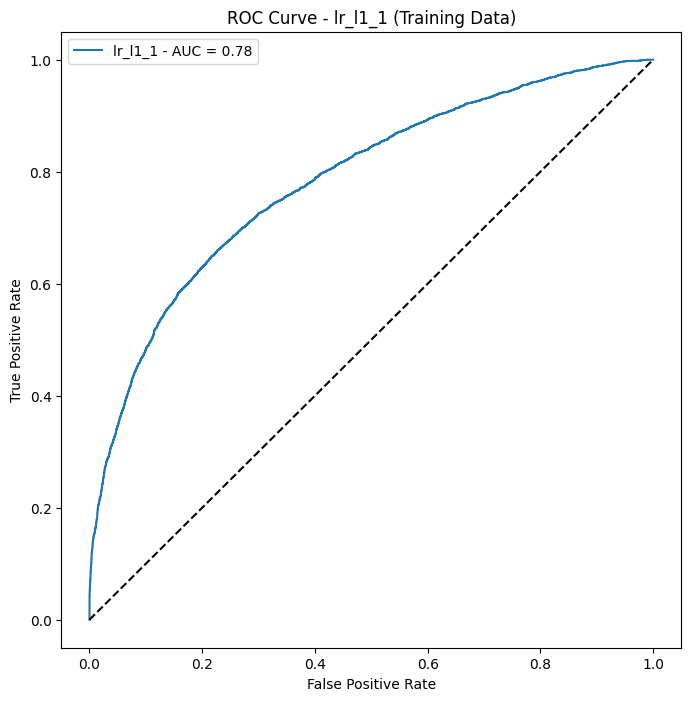

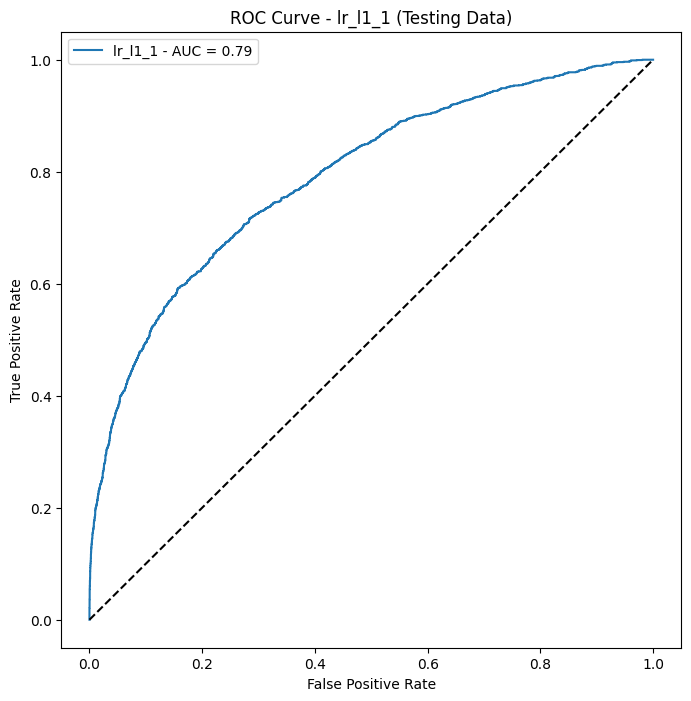

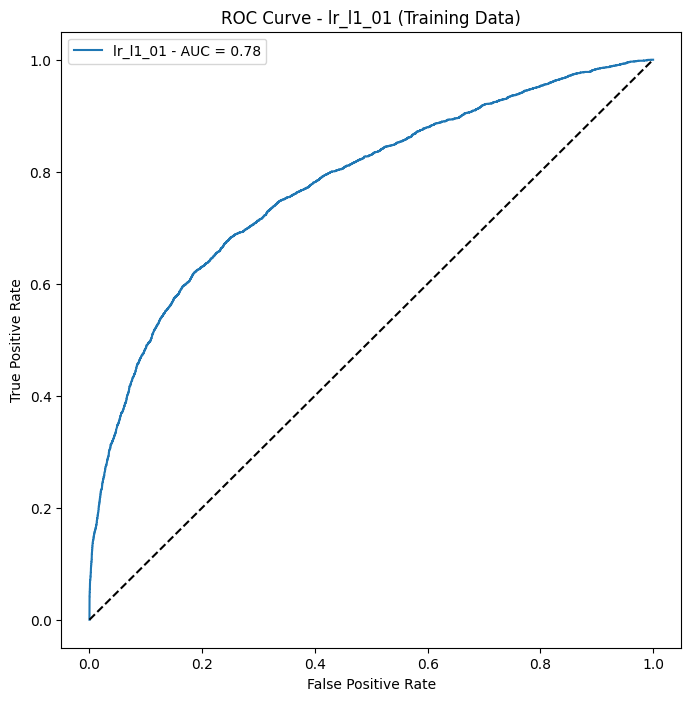

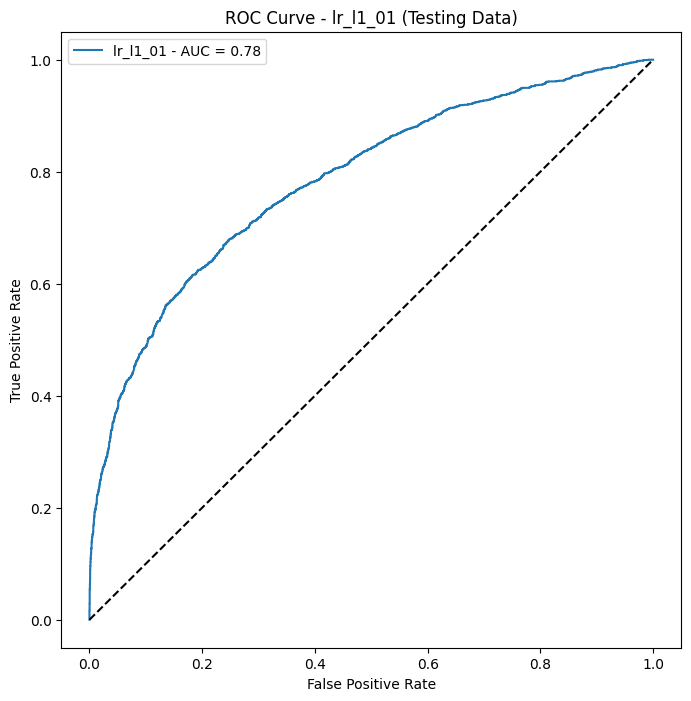

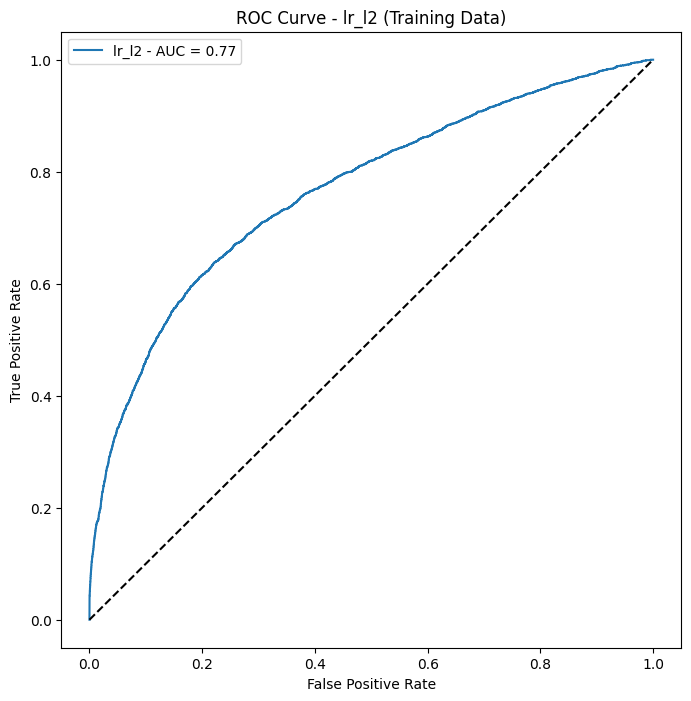

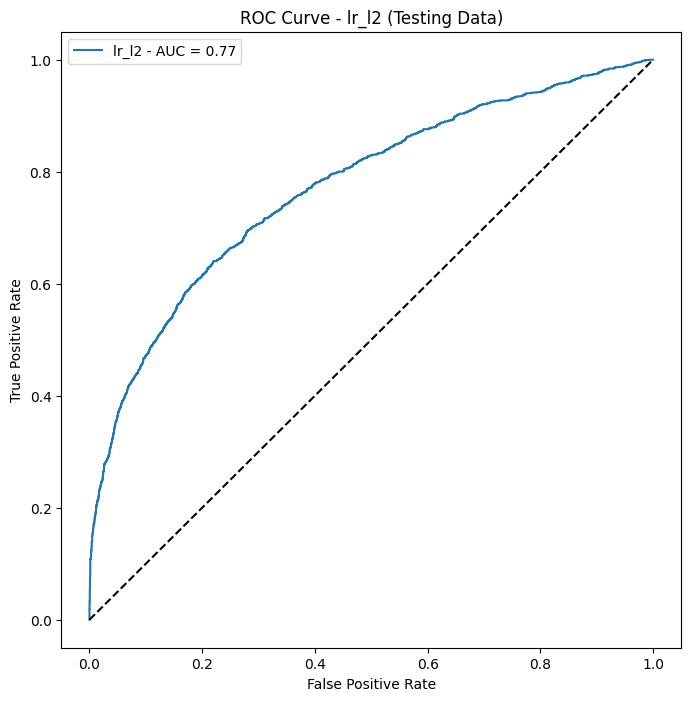

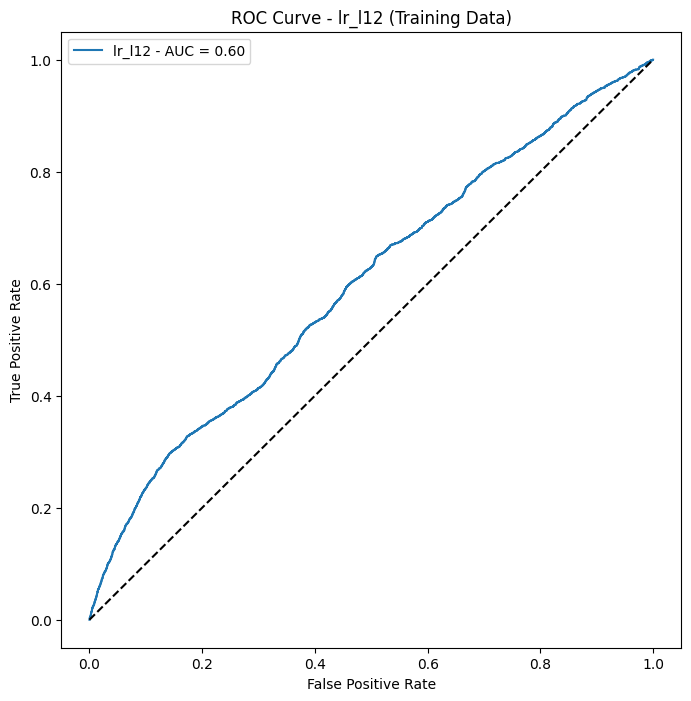

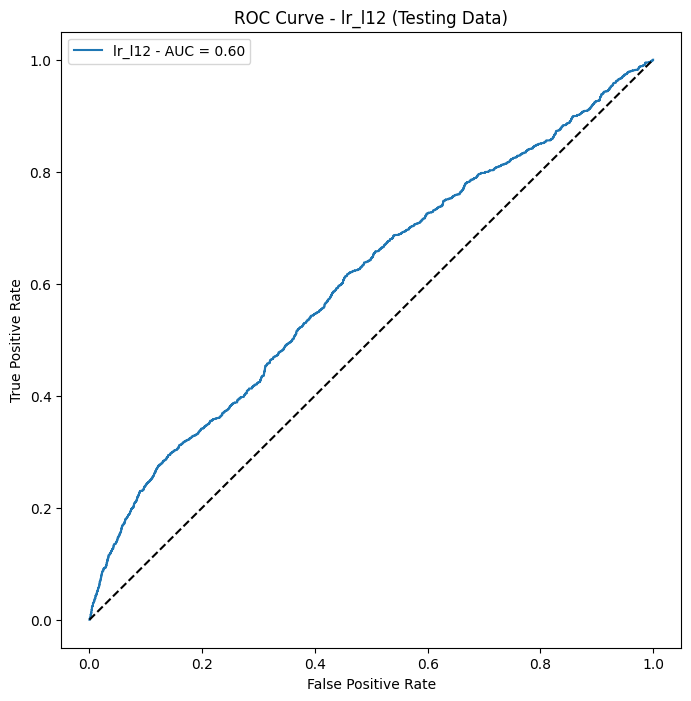

In [410]:
# Define a function to plot ROC curve
def plot_roc_curve(model_name, y_true, y_probs, dataset_type):
    fpr, tpr, thresholds = roc_curve(y_true, y_probs[:, 1])
    auc = roc_auc_score(y_true, y_probs[:, 1])

    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, label=f'{model_name} - AUC = {auc:.2f}')
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random model
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name} ({dataset_type} Data)')
    plt.legend()
    plt.show()

# Plot ROC curves for lr_l1_1
plot_roc_curve("lr_l1_1", y3_train, y_proba_train, "Training")
plot_roc_curve("lr_l1_1", y3_test, y_proba_test, "Testing")

# Plot ROC curves for lr_l1_01
plot_roc_curve("lr_l1_01", y3_train, y_proba_train1, "Training")
plot_roc_curve("lr_l1_01", y3_test, y_proba_test1, "Testing")

# Plot ROC curves for lr_l2
plot_roc_curve("lr_l2", y3_train, y_proba_train2, "Training")
plot_roc_curve("lr_l2", y3_test, y_proba_test2, "Testing")

# Plot ROC curves for lr_l12
plot_roc_curve("lr_l12", y3_train, y_proba_train12, "Training")
plot_roc_curve("lr_l12", y3_test, y_proba_test12, "Testing")

# Decision Tree

## Create a Decision Tree

- We will use 3 parameters to control the growth of the tree

- max_depth determines the maximum number of levels for the tree. Smaller values help to prevent overfitting. Default value = None

- min_samples_leaf determines the minimum number of observations that must remain in a leaf. If a split leaves fewer than this number of observations, the split cannot be performed. Larger values help to prevent overfitting. Default value = 1.

- ccp_alpha is the cost complexity parameter and can be used for post-pruning the tree to help prevent overfitting. Default value = 0. Larger values yield a smaller tree.

In [369]:
df_dt = df
df_dt.head()

,DemAffl,DemAge,DemCluster,DemClusterGroup,DemGender,DemReg,DemTVReg,PromClass,PromSpend,PromTime,TargetBuy
0,10.0,76.0,16.0,C,U,Midlands,Wales & West,Gold,16000.00,4.0,0
1,4.0,49.0,35.0,D,U,Midlands,Wales & West,Gold,6000.00,5.0,0
2,5.0,70.0,27.0,D,F,Midlands,Wales & West,Silver,0.02,8.0,1
3,10.0,65.0,51.0,F,M,Midlands,Midlands,Tin,0.01,7.0,1
4,11.0,68.0,4.0,A,F,Midlands,Midlands,Tin,0.01,8.0,0


In [370]:
# Organize the column so that it matches the test data
desired_order = ['DemAffl', 'DemAge', 'DemCluster', 'DemClusterGroup', 'DemGender', 'DemReg', 'DemTVReg', 'PromClass', 'PromSpend', 'PromTime', 'TargetBuy']
df_dt = df_dt[desired_order].copy()
df_dt.head()

,DemAffl,DemAge,DemCluster,DemClusterGroup,DemGender,DemReg,DemTVReg,PromClass,PromSpend,PromTime,TargetBuy
0,10.0,76.0,16.0,C,U,Midlands,Wales & West,Gold,16000.00,4.0,0
1,4.0,49.0,35.0,D,U,Midlands,Wales & West,Gold,6000.00,5.0,0
2,5.0,70.0,27.0,D,F,Midlands,Wales & West,Silver,0.02,8.0,1
3,10.0,65.0,51.0,F,M,Midlands,Midlands,Tin,0.01,7.0,1
4,11.0,68.0,4.0,A,F,Midlands,Midlands,Tin,0.01,8.0,0


In [371]:
# Take categorical columns into numerical dummies where each category is replaced by a number starting with 0
def dummyize (x, columns):
  for column in range(0,len(columns)):
    if x == columns[column]:
      return column

In [372]:
# Make the categorical columns into dummies using the dummyize function so it can be used for the decision tree
df_dt['DemGender'] = df_dt['DemGender'].apply(lambda x: dummyize(x, pd.get_dummies(df['DemGender']).columns))
df_dt['DemClusterGroup'] = df_dt['DemClusterGroup'].apply(lambda x: dummyize(x, pd.get_dummies(df['DemClusterGroup']).columns))
df_dt['DemReg'] = df_dt['DemReg'].apply(lambda x: dummyize(x, pd.get_dummies(df['DemReg']).columns))
df_dt['PromClass'] = df_dt['PromClass'].apply(lambda x: dummyize(x, pd.get_dummies(df['PromClass']).columns))
df_dt['DemTVReg'] = df_dt['DemTVReg'].apply(lambda x: dummyize(x, pd.get_dummies(df['DemTVReg']).columns))

In [373]:
# split the data into training and testing sets
X4 = df_dt.drop(['TargetBuy'], axis=1)
#Full model minus variables causing singularities in the model
X4=df_dt[['DemAffl', 'DemAge', 'DemCluster', 'DemClusterGroup', 'DemGender', 'DemReg', 'DemTVReg', 'PromClass', 'PromSpend', 'PromTime']] # Dropped TargetAmt since it provides issues with the model later on

y4 = df_dt['TargetBuy']
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.3, random_state=42)

X4_train.info()
y4_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15556 entries, 5426 to 15795
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DemAffl          15556 non-null  float64
 1   DemAge           15556 non-null  float64
 2   DemCluster       15556 non-null  float64
 3   DemClusterGroup  15556 non-null  int64  
 4   DemGender        15556 non-null  int64  
 5   DemReg           15556 non-null  int64  
 6   DemTVReg         15556 non-null  int64  
 7   PromClass        15556 non-null  int64  
 8   PromSpend        15556 non-null  float64
 9   PromTime         15556 non-null  float64
dtypes: float64(5), int64(5)
memory usage: 1.3 MB
<class 'pandas.core.series.Series'>
Int64Index: 15556 entries, 5426 to 15795
Series name: TargetBuy
Non-Null Count  Dtype   
--------------  -----   
15556 non-null  category
dtypes: category(1)
memory usage: 136.8 KB


## Create another decision tree

In [374]:
# create an instance of a decision tree classifier

dt = DecisionTreeClassifier(max_depth = 5, min_samples_leaf=10, ccp_alpha = 0)

# fit the model to the training data
dt.fit(X4_train, y4_train)

# this code can be used to produce a textual representation of the tree if desired
# text_rep = tree.export_text(dt)
# print(text_rep)

DecisionTreeClassifier(ccp_alpha=0, max_depth=5, min_samples_leaf=10)

## Visualize the tree again

In [375]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
# visualize the decision tree
dot_data = export_graphviz(dt, filled=True, rounded=True, feature_names=X4.columns, class_names=['0', '1'])
graph = graphviz.Source(dot_data)
graph.render("decision_tree")

'decision_tree.pdf'

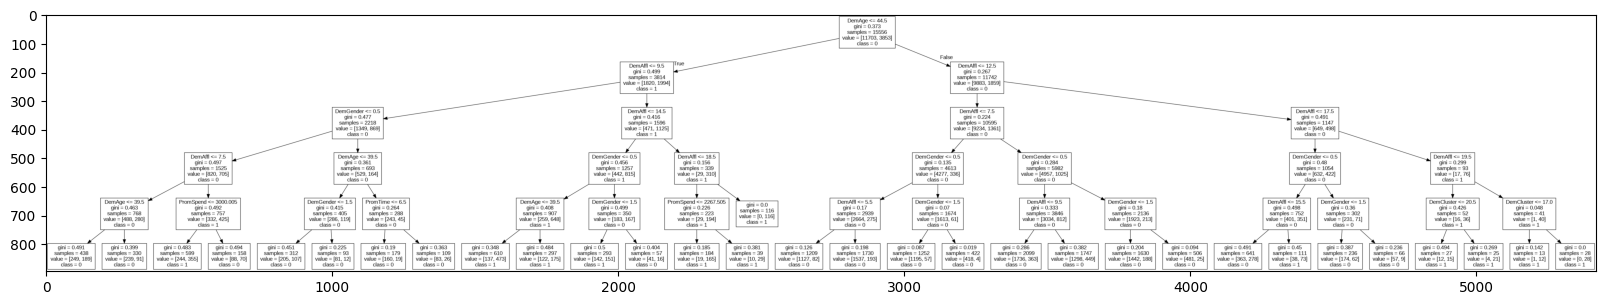

In [376]:
export_graphviz(dt,
                'tree.dot',
                class_names=['0','1'],
                feature_names = X4.columns)
! dot -Tpng tree.dot -o tree.png

import matplotlib.pyplot as plt
import cv2
%matplotlib inline
img = cv2.imread('tree.png')
plt.figure(figsize = (20, 40))
plt.imshow(img)

## Make Predictions on training and test data

In [377]:
# make predictions on the training and test data
y_pred_train = dt.predict(X4_train)
y_pred_test = dt.predict(X4_test)

y_prob_train = dt.predict_proba(X4_train)
y_prob_test = dt.predict_proba(X4_test)


## Assess Model on training and test data

In [378]:
# calculate the accuracy, precision, and recall scores
acc_train = accuracy_score(y_train, y_pred_train)
prec_train = precision_score(y_train, y_pred_train)
rec_train = recall_score(y_train, y_pred_train)

# print the scores
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc_train))
print("Precision: {:.4f}".format(prec_train))
print("Recall.  : {:.4f}".format(rec_train))
print("")

# calculate the accuracy, precision, and recall scores
acc_test = accuracy_score(y_test, y_pred_test)
prec_test = precision_score(y_test, y_pred_test)
rec_test = recall_score(y_test, y_pred_test)

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc_test))
print("Precision: {:.4f}".format(prec_test))
print("Recall.  : {:.4f}".format(rec_test))

 -- train set -- 
Accuracy : 0.8091
Precision: 0.6887
Recall.  : 0.4186

 -- test set -- 
Accuracy : 0.8040
Precision: 0.6657
Recall.  : 0.4195


## Generate a confusion matrix for the training and test data

In [379]:
# confusion matrix
conf_matrix = confusion_matrix(y_pred_train, y_train)
print(conf_matrix)

# Generate confusion matrix for test set
conf_matrix = confusion_matrix(y_pred_test, y_test)
print(conf_matrix)

[[10974  2240]
 [  729  1613]]
[[4667  959]
 [ 348  693]]


## ROC Curve for training data

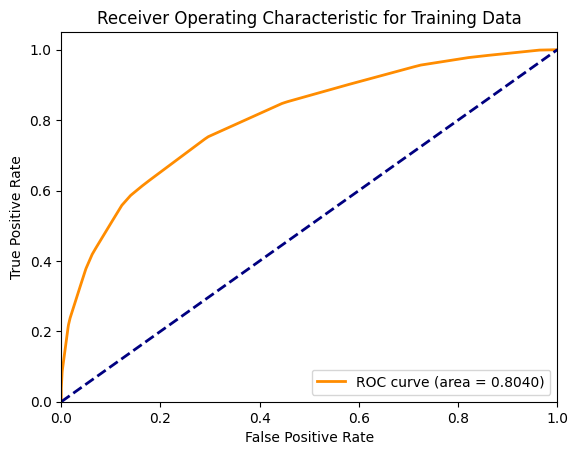

In [380]:
# Generate ROC curve for training data

fpr, tpr, thresholds = roc_curve(y_train.cat.codes, y_prob_train[:,1])
roc_auc = roc_auc_score(y_train.cat.codes, y_prob_train[:,1])

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Training Data')
plt.legend(loc='lower right')
plt.show()

## ROC curve for test data

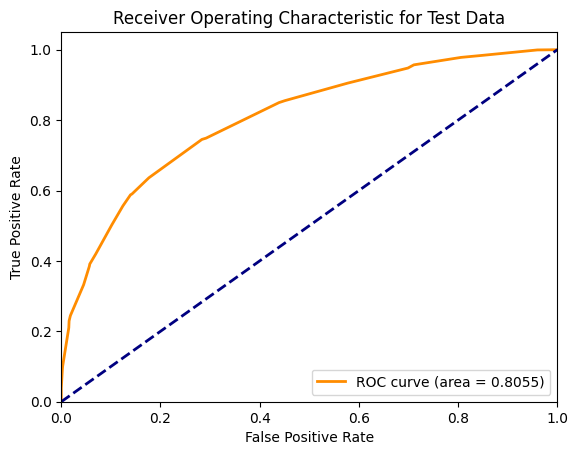

In [381]:
# Generate ROC curve for test data
fpr, tpr, thresholds = roc_curve(y_test.cat.codes, y_prob_test[:,1])
roc_auc = roc_auc_score(y_test.cat.codes, y_prob_test[:,1])

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Test Data')
plt.legend(loc='lower right')
plt.show()

## Print feature importance of the tree

   importance          feature
1    0.522651           DemAge
0    0.365182          DemAffl
4    0.104477        DemGender
8    0.004676        PromSpend
9    0.001563         PromTime
2    0.001451       DemCluster
3    0.000000  DemClusterGroup
5    0.000000           DemReg
6    0.000000         DemTVReg
7    0.000000        PromClass


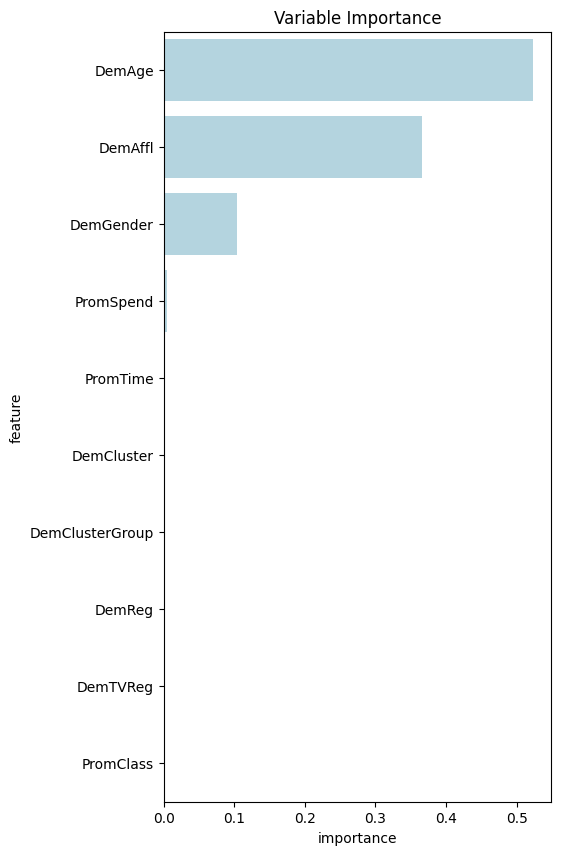

In [382]:
#calculate feature importance
tree_imp = dt.feature_importances_

#create a data frame with feature names

# creating a list of column names
column_values = ['importance']

# creating the dataframe
df_feature_importance = pd.DataFrame(data = tree_imp,
                  columns = column_values)
df_feature_importance['feature']=X4.columns

#sort data so features with largest importance values are at the top
df2 = df_feature_importance.sort_values(by=['importance'], ascending=False)

print(df2)

#Create variable importance plot
plt.figure(figsize=(5, 10))
plt.title('Variable Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
sns.barplot(data=df2,
            y=df2['feature'],
            x=df2['importance'], color="lightblue")

plt.show()

# Tune Parameters of classification Tree

In [383]:
from sklearn.model_selection import GridSearchCV

In [384]:
dt_tune = DecisionTreeClassifier()

param_grid = {
    'max_depth': [None, 5, 10, 15, 20, 25],
    'min_samples_leaf': [1, 10, 20, 50, 100],
    'ccp_alpha': [0, 0.001, 0.01, 0.1, 0.5, 1]
}

grid_search = GridSearchCV(dt_tune, param_grid, cv=5)
grid_search.fit(X4_train, y4_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print(best_params)

{'ccp_alpha': 0.001, 'max_depth': None, 'min_samples_leaf': 100}


## Run the tuned tree

In [385]:
# create an instance of a decision tree classifier

dt = DecisionTreeClassifier(max_depth = None, min_samples_leaf=100, ccp_alpha = 0.001)

# fit the model to the training data
dt.fit(X4_train, y4_train)

# this code can be used to produce a textual representation of the tree if desired
# text_rep = tree.export_text(dt)
# print(text_rep)

DecisionTreeClassifier(ccp_alpha=0.001, min_samples_leaf=100)

## Visualize the Tree

In [386]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
# visualize the decision tree
dot_data = export_graphviz(dt, filled=True, rounded=True, feature_names=X4.columns, class_names=['0', '1'])
graph = graphviz.Source(dot_data)
graph.render("decision_tree")

'decision_tree.pdf'

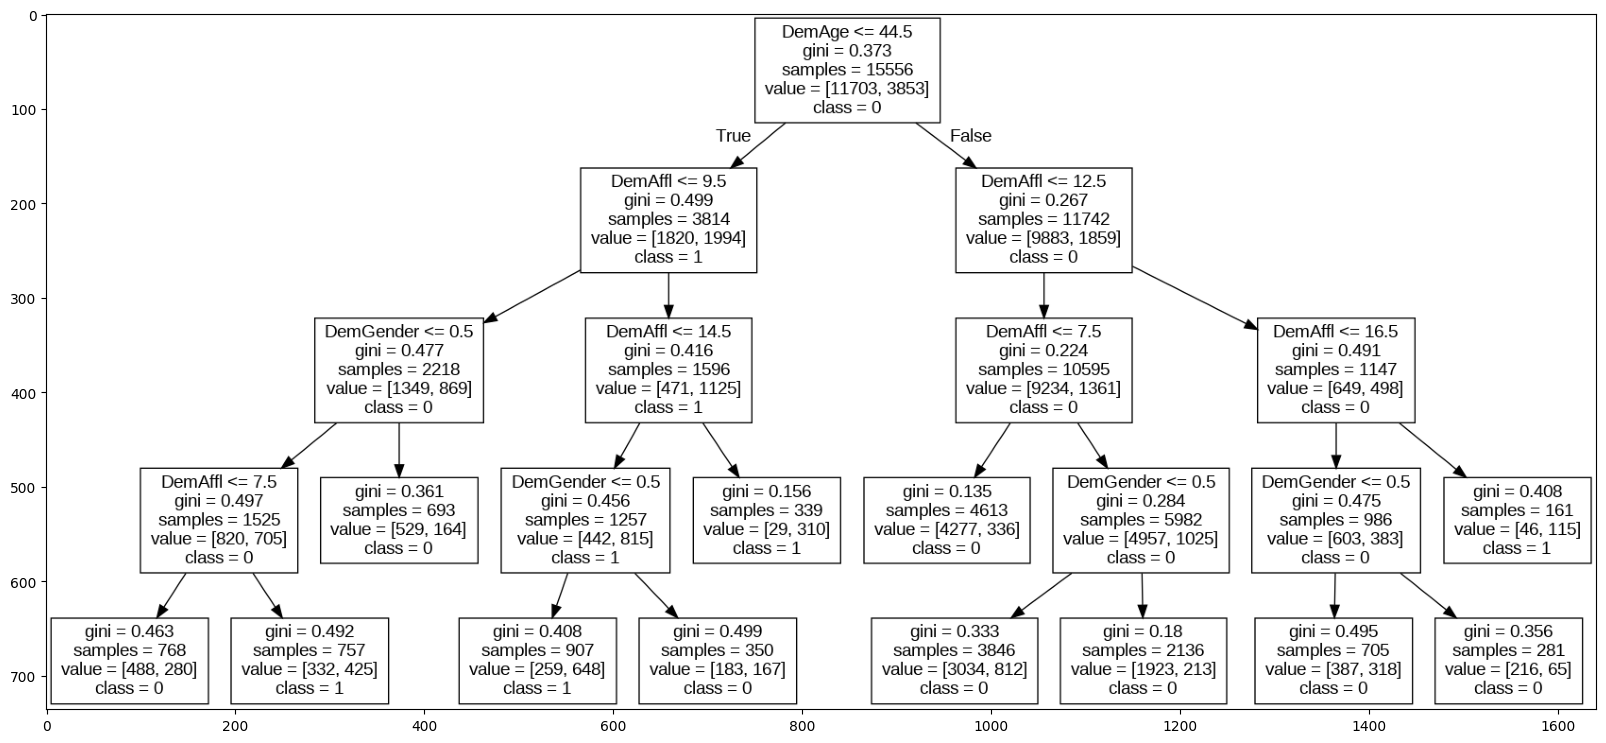

In [387]:
export_graphviz(dt,
                'tree.dot',
                class_names=['0','1'],
                feature_names = X4.columns)
! dot -Tpng tree.dot -o tree.png

import matplotlib.pyplot as plt
import cv2
%matplotlib inline
img = cv2.imread('tree.png')
plt.figure(figsize = (20, 40))
plt.imshow(img)

## Make predictions on training and test data

In [388]:
# make predictions on the training and test data
y_pred_train = dt.predict(X4_train)
y_pred_test = dt.predict(X4_test)

y_prob_train = dt.predict_proba(X4_train)
y_prob_test = dt.predict_proba(X4_test)

## Assess Model on training and test

In [389]:
# calculate the accuracy, precision, and recall scores
acc_train = accuracy_score(y_train, y_pred_train)
prec_train = precision_score(y_train, y_pred_train)
rec_train = recall_score(y_train, y_pred_train)

# print the scores
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc_train))
print("Precision: {:.4f}".format(prec_train))
print("Recall.  : {:.4f}".format(rec_train))
print("")

# calculate the accuracy, precision, and recall scores
acc_test = accuracy_score(y_test, y_pred_test)
prec_test = precision_score(y_test, y_pred_test)
rec_test = recall_score(y_test, y_pred_test)

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc_test))
print("Precision: {:.4f}".format(prec_test))
print("Recall.  : {:.4f}".format(rec_test))

 -- train set -- 
Accuracy : 0.8058
Precision: 0.6922
Recall.  : 0.3888

 -- test set -- 
Accuracy : 0.8044
Precision: 0.6790
Recall.  : 0.3995


## Confusion Matrix

In [390]:
# confusion matrix
conf_matrix = confusion_matrix(y_pred_train, y_train)
print(conf_matrix)

# Generate confusion matrix for test set
conf_matrix = confusion_matrix(y_pred_test, y_test)
print(conf_matrix)

[[11037  2355]
 [  666  1498]]
[[4703  992]
 [ 312  660]]


## ROC Curve for Training Data

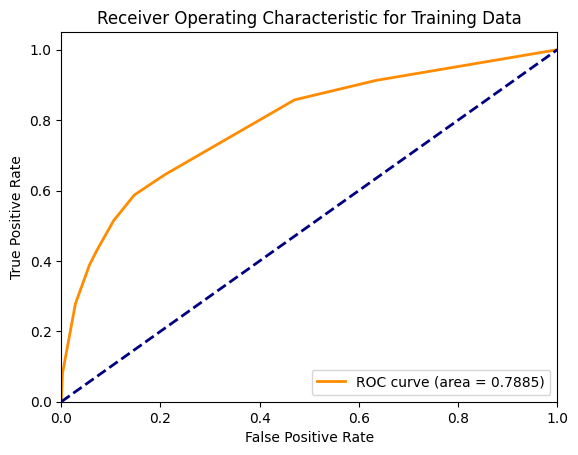

In [391]:
# Generate ROC curve for training data

fpr, tpr, thresholds = roc_curve(y_train.cat.codes, y_prob_train[:,1])
roc_auc = roc_auc_score(y_train.cat.codes, y_prob_train[:,1])

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Training Data')
plt.legend(loc='lower right')
plt.show()

## ROC Curve for Test Data

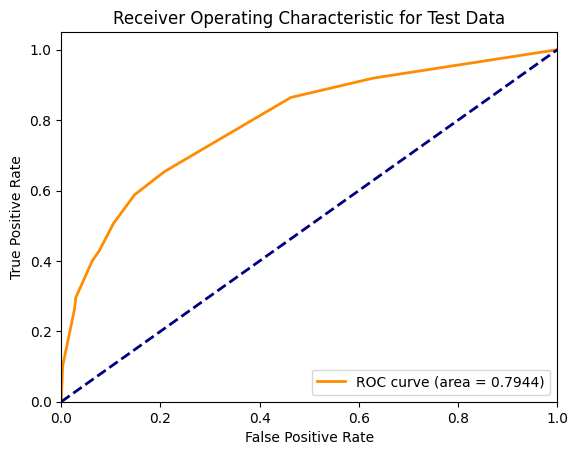

In [392]:
# Generate ROC curve for test data
fpr, tpr, thresholds = roc_curve(y_test.cat.codes, y_prob_test[:,1])
roc_auc = roc_auc_score(y_test.cat.codes, y_prob_test[:,1])

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Test Data')
plt.legend(loc='lower right')
plt.show()

## Feature Importance

   importance          feature
1    0.539405           DemAge
0    0.368601          DemAffl
4    0.091993        DemGender
2    0.000000       DemCluster
3    0.000000  DemClusterGroup
5    0.000000           DemReg
6    0.000000         DemTVReg
7    0.000000        PromClass
8    0.000000        PromSpend
9    0.000000         PromTime


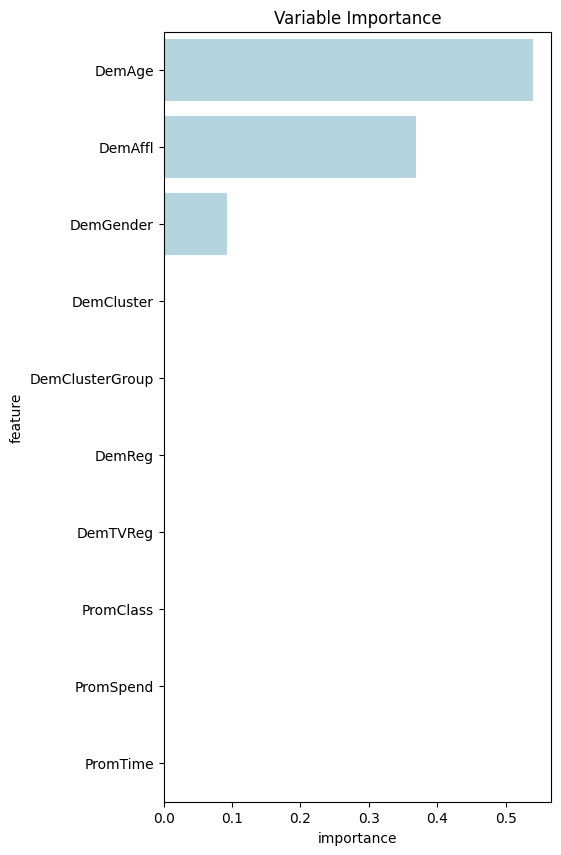

In [393]:
#calculate feature importance
tree_imp = dt.feature_importances_

#create a data frame with feature names

# creating a list of column names
column_values = ['importance']

# creating the dataframe
df_feature_importance = pd.DataFrame(data = tree_imp,
                  columns = column_values)
df_feature_importance['feature']=X4.columns

#sort data so features with largest importance values are at the top
df2 = df_feature_importance.sort_values(by=['importance'], ascending=False)

print(df2)

#Create variable importance plot
plt.figure(figsize=(5, 10))
plt.title('Variable Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
sns.barplot(data=df2,
            y=df2['feature'],
            x=df2['importance'], color="lightblue")

plt.show()

# Score

In [394]:
df_new.drop(['ID'], axis=1, inplace=True)

In [395]:
# Make the categorical columns into dummies using the dummyize function so it can be used for scoring
df_new['DemGender'] = df_new['DemGender'].apply(lambda x: dummyize(x, pd.get_dummies(df_new['DemGender']).columns))
df_new['DemClusterGroup'] = df_new['DemClusterGroup'].apply(lambda x: dummyize(x, pd.get_dummies(df_new['DemClusterGroup']).columns))
df_new['DemReg'] = df_new['DemReg'].apply(lambda x: dummyize(x, pd.get_dummies(df_new['DemReg']).columns))
df_new['PromClass'] = df_new['PromClass'].apply(lambda x: dummyize(x, pd.get_dummies(df_new['PromClass']).columns))
df_new['DemTVReg'] = df_new['DemTVReg'].apply(lambda x: dummyize(x, pd.get_dummies(df_new['DemTVReg']).columns))

In [396]:
df_new.head()

,DemAffl,DemAge,DemCluster,DemClusterGroup,DemGender,DemReg,DemTVReg,PromClass,PromSpend,PromTime
0,6,46,27,3,0,3,2,3,0.01,8
1,10,39,12,1,1,0,9,3,0.01,5
2,7,75,12,1,1,0,1,2,4000.00,7
3,7,72,12,1,0,0,9,2,1250.00,23
4,7,43,53,5,1,1,6,3,0.01,5


In [397]:
X4.head()

,DemAffl,DemAge,DemCluster,DemClusterGroup,DemGender,DemReg,DemTVReg,PromClass,PromSpend,PromTime
0,10.0,76.0,16.0,2,2,0,11,0,16000.00,4.0
1,4.0,49.0,35.0,3,2,0,11,0,6000.00,5.0
2,5.0,70.0,27.0,3,0,0,11,2,0.02,8.0
3,10.0,65.0,51.0,5,1,0,4,3,0.01,7.0
4,11.0,68.0,4.0,0,0,0,4,3,0.01,8.0


In [398]:
# make predictions on the training and test data
Scored_class = dt.predict(df_new)
Scored_probs = dt.predict_proba(df_new)

df_new['pred_buy'] = Scored_class
df_new['prod_prob_buy']= Scored_probs[:,1]

print(df_new)

     DemAffl  DemAge  DemCluster  DemClusterGroup  DemGender  DemReg  \
0          6      46          27                3          0       3   
1         10      39          12                1          1       0   
2          7      75          12                1          1       0   
3          7      72          12                1          0       0   
4          7      43          53                5          1       1   
..       ...     ...         ...              ...        ...     ...   
145        3      59          12                1          0       0   
146        8      69          16                2          1       3   
147        7      27          52                5          0       3   
148       10      63          14                1          1       3   
149       18      41          35                3          0       1   

     DemTVReg  PromClass  PromSpend  PromTime  pred_buy  prod_prob_buy  
0           2          3       0.01         8         0       

# Export the scored data

In [399]:
scored_file = 'OrganicCustomerrScores.xlsx'
df_new.to_excel(scored_file)